# Data Science Methods for Clean Energy Research 
## *Descriptive Statistics*

## Outline
### 1. Computing the mean median and variance of a dataset population
### 2. Drawing samples and Distribution of sample mean & variance 
### 3. Bootstrapping


---

## Import libraries and dataset

We import the libraries we will need to use

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import clear_output, display
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

You can find many datasets on kaggle, ranging from search for exoplanets to world happiness!

https://www.kaggle.com/unsdsn/world-happiness

In [4]:
df = pd.read_csv('datasets/2015.csv')
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


We will assume that this dataset is complete and that somehow it is the full **population**. In reality it would still be a sample. Let's look at a histogram of the 'Happiness Score', the histogram is a representation of the **distribution** of the population of Happiness Scores.

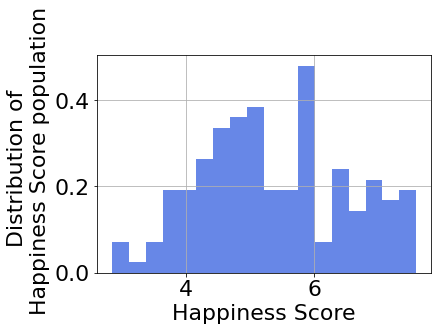

In [6]:
df['Happiness Score'].hist(bins=18, color='royalblue', alpha=0.8, density=True)
plt.xlabel('Happiness Score')
plt.ylabel('Distribution of \n Happiness Score population')
plt.show()

We can see that the population isn't normally distributed - **does not follow** a perfect Gaussian or Normal distribution:

$$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$$

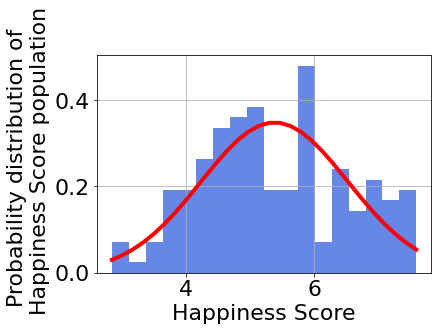

In [7]:
df['Happiness Score'].hist(bins=18, density=True, color='royalblue',alpha=0.8)
plt.xlabel('Happiness Score')
plt.ylabel('Probability distribution of \n Happiness Score population')

# Let's see what the best gaussian would look like
sigma = 1.145010
mu = 5.375734
bins = np.linspace(2.839000,7.587000,30)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=4, color='red')
plt.show()

What if we estimated the probability distribution using a [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation)? .. we will see it is not a Gaussian distribution yet again.

Text(0, 0.5, 'Probability distribution of \n Happiness Score population')

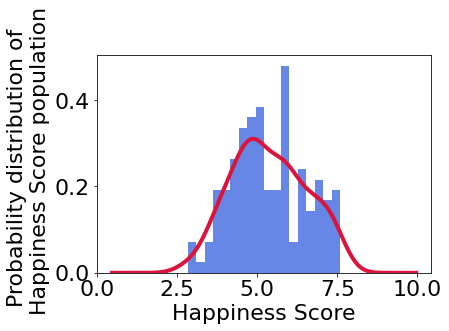

In [9]:

df['Happiness Score'].hist(bins=18, density=True, color='royalblue',alpha=0.8)
df['Happiness Score'].plot.kde(linewidth=4,color="crimson")
plt.xlabel('Happiness Score')
plt.ylabel('Probability distribution of \n Happiness Score population')

## 1) Computing the mean, median, standard deviation and variance

Wait how did I get the **mean** and **standard** deviation? Well we assumed we had the entire population so we computed it simply as 

$${\mu}=\frac{\sum_{i=1}^N X_i}{N}$$ 

$$\sigma=\sqrt{\sum_{i=1}^N\frac{(X_i-\mu)^2}{N}}$$


In [20]:
N = len(df['Happiness Score'].values)

mean = np.sum( df['Happiness Score'].values ) / N 
print(mean)

mean = 0.0
for i in range(N):
    mean += df['Happiness Score'].values[i]
mean = mean /N
print(mean)

5.375734177215189
5.3757341772151905


In [23]:
df['Happiness Score'].describe()

df['Happiness Score'].mean()

5.375734177215189

### Exercise 1: Compute the standard deviation and variance 

In [24]:
df['Happiness Score'].std() # divides by N-1 for a sample

1.1450101349520665

In [26]:
stdev = np.sqrt(np.sum([(Xi - mean)**2 for Xi in df['Happiness Score'].values])/(N))
print(stdev)

1.1413809336358134


Slightly different standard deviation? Because describe computes std as the corrected sample standard deviation which is unbiased

$$\sigma=\sqrt{\sum_{i=1}^{N}\frac{(X_i-\mu)^2}{N-1}}$$

In [28]:
var = stdev**2

print(var)

1.3027504356673612


### Exercise 2: Compute the median 

In [30]:
HS = np.sort(df['Happiness Score'].values)
if len(HS) %2 == 0:
    median = ( HS[int(len(HS)/2)-1] + HS[int(len(HS)/2)] )/2
else:
    median = HS[int(len(HS)/2)-1] 
    
print("my median", median)    
median = df['Happiness Score'].median()
print("their median", median)

my median 5.2325
their median 5.2325


Where do these values end up on the plot?

(2.6, 7.6)

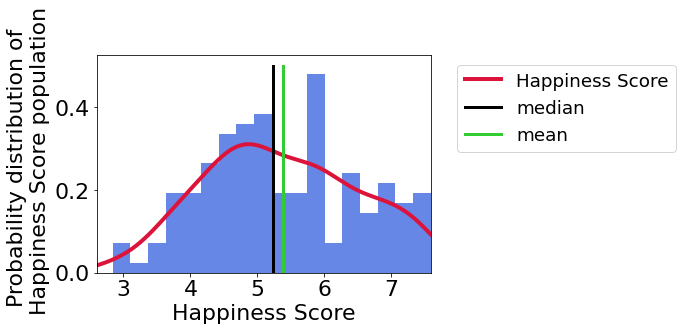

In [31]:
df['Happiness Score'].hist(bins=18,density=True,color='royalblue',alpha=0.8)
df['Happiness Score'].plot.kde(linewidth=4,color="crimson")

plt.plot(median*np.ones(10),np.linspace(0,0.5,10),lw=3,color='black',label='median')
plt.plot(mean*np.ones(10),np.linspace(0,0.5,10),lw=3,color='limegreen',label='mean')

plt.xlabel('Happiness Score')
plt.ylabel('Probability distribution of \n Happiness Score population')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.xlim([2.6,7.6])

## 2) Sampling from a population, sample distributions & the central limit theorem

Let's go back to our Clean Energy Project database and load the data. Note: make sure you have the correct path to that file.

In [32]:
data = pd.read_csv('http://faculty.washington.edu/dacb/HCEPDB_moldata.zip')

In [33]:
data.describe()

,id,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
count,2.322849e+06,2.322849e+06,2.322849e+06,2.322849e+06,2.322849e+06,2.322849e+06,2.322849e+06,2.322849e+06
mean,1.328794e+06,4.155640e+02,3.924612e+00,5.520989e-01,1.204695e+02,-5.173904e+00,1.881213e+00,-3.292690e+00
std,8.569731e+05,5.985317e+01,2.507639e+00,3.037830e-01,6.676970e+01,3.028554e-01,4.002805e-01,3.902608e-01
min,1.000000e+00,1.682378e+02,0.000000e+00,0.000000e+00,0.000000e+00,-7.512315e+00,-2.939619e-03,-6.086537e+00
25%,6.121220e+05,3.784536e+02,2.058252e+00,3.428861e-01,6.967192e+01,-5.367790e+00,1.588780e+00,-3.587081e+00
50%,1.224067e+06,4.155597e+02,3.419332e+00,5.405897e-01,1.119042e+02,-5.158766e+00,1.866297e+00,-3.280963e+00
75%,1.977982e+06,4.566924e+02,5.607110e+00,7.499653e-01,1.627444e+02,-4.966306e+00,2.161109e+00,-3.006803e+00
max,3.102853e+06,6.863590e+02,1.113013e+01,2.178957e+00,3.970383e+02,-3.632374e+00,3.803964e+00,-1.148421e+00


This dataset is huge! We will take a random slice and assume that our slice represents a full population (again this is actually a large sample) and look at the mass values. We are making this approximation to accelerate the calculations in the notebook.

In [61]:
population = data.sample(frac = 0.05, random_state = 3202242) 
population.describe()

,id,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
count,1.161420e+05,116142.000000,116142.000000,116142.000000,116142.000000,116142.000000,116142.000000,116142.000000
mean,1.328308e+06,415.411587,3.918153,0.552531,120.160000,-5.175048,1.882893,-3.292154
std,8.556371e+05,59.984441,2.507449,0.304021,66.826499,0.303209,0.400665,0.390843
min,1.200000e+01,171.198100,0.000000,0.000000,0.000000,-6.703816,0.744835,-4.442752
25%,6.154142e+05,378.453600,2.052450,0.343396,69.223461,-5.368923,1.591331,-3.587286
50%,1.225376e+06,415.518300,3.410439,0.541440,110.994282,-5.160067,1.868705,-3.279520
75%,1.975157e+06,456.676400,5.601004,0.750566,162.292795,-4.967307,2.162933,-3.005879
max,3.102795e+06,686.359000,11.106094,2.103816,377.184588,-3.975422,3.628887,-1.658248


In [37]:
true_mean = population['mass'].mean()
true_stdev = population['mass'].std()
print("pop mean", true_mean, "pop stdev", true_stdev)

pop mean 415.4115869349589 pop stdev 59.9844406861939


<AxesSubplot:ylabel='Frequency'>

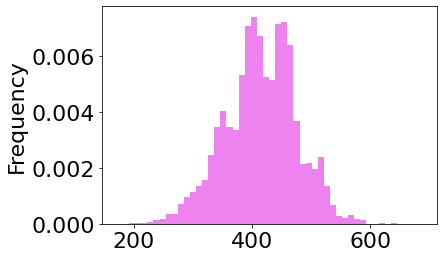

In [39]:
population['mass'].plot.hist(bins=50, color='violet', density=True)

<AxesSubplot:ylabel='Density'>

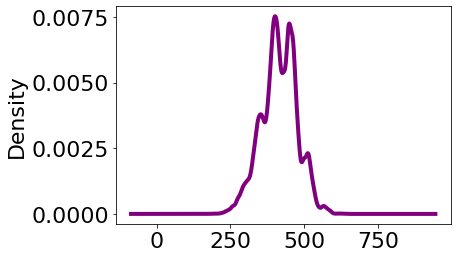

In [40]:
population['mass'].plot.kde(color='purple',lw=4)

Our goal is to **sample** from the mass values to attempt to compute the true population mean and standard deviation. Let's write a function that samples the  dataframe with an argument *n* that is the number of samples to take. We want to sample without replacement.

In [51]:
type(np.array(population['mass'].index))

numpy.ndarray

In [52]:
def draw_sample(datafr, column, n):
    subset_indices = np.random.choice(np.array(list(datafr[column].index)), size=n, replace=False)
    sample = pd.DataFrame(data=datafr[column][subset_indices].values, columns=['sample'])
    return sample

In [64]:
sample = draw_sample(population,'mass', 20)
sample #= draw_sample(df,'Happiness Score', 20)

,sample
0,467.6677
1,511.3879
2,445.3630
3,427.5253
4,381.5295
5,409.6195
6,348.4074
7,441.2051
8,504.5149
9,403.5793


In [63]:
population.describe()

,id,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
count,1.161420e+05,116142.000000,116142.000000,116142.000000,116142.000000,116142.000000,116142.000000,116142.000000
mean,1.328308e+06,415.411587,3.918153,0.552531,120.160000,-5.175048,1.882893,-3.292154
std,8.556371e+05,59.984441,2.507449,0.304021,66.826499,0.303209,0.400665,0.390843
min,1.200000e+01,171.198100,0.000000,0.000000,0.000000,-6.703816,0.744835,-4.442752
25%,6.154142e+05,378.453600,2.052450,0.343396,69.223461,-5.368923,1.591331,-3.587286
50%,1.225376e+06,415.518300,3.410439,0.541440,110.994282,-5.160067,1.868705,-3.279520
75%,1.975157e+06,456.676400,5.601004,0.750566,162.292795,-4.967307,2.162933,-3.005879
max,3.102795e+06,686.359000,11.106094,2.103816,377.184588,-3.975422,3.628887,-1.658248


Now we want to draw *M* samples of size *n* from the population and see what the mean and standard deviation are for these samples.

### Exercise 3: Breakout room

Create a function which calls <code>draw_sample</code> *M* times and returns the mean and standard deviation of each sample. 

Input arguments should include

* a variable called .. let's say <code>sample_funct</code> this variable will be used to refer to the <code>draw_sample</code> function
* a variable for the dataframe
* a variable for the column of interest
* a variable for the number of calls *M*
* a variable for the number of data points per samples *n*

The output should include

* a list which contains the means
* a list which contains the standard deviations

Hint: your function might look like:

<code>def repeat_samples_stats(sample_funct, df, column, M, n):  
   means = []  
   stdevs = []  
   ...  
   return (means, stdevs)
</code>

then use the append method to append each mean and sd value to the end of each respective list.

In [65]:
def repeat_samples_stats(sample_funct, df, column, M, n):
    
    means = []
    stdevs = []
    
    for i in range(M):
        if i%10 ==0:
            clear_output(wait=True)
            print("Iteration ", i, "of ", M)
        sample = sample_funct(df, column, n)
        means.append(sample['sample'].mean())
        stdevs.append(sample['sample'].std())
    
    return (means, stdevs)

Let's use our function to make 20 samples and compute 20 means and 20 standard deviations. We will extract 50 points per sample.

In [73]:
means_1, stdevs_1 = repeat_samples_stats(draw_sample, population, 'mass', 5000, 50)

Iteration  4990 of  5000


In [70]:
means_1

[418.59415199999995,
 403.391724,
 437.1894700000001,
 401.367516,
 413.050426,
 409.2277580000001,
 421.074736,
 410.64060600000005,
 410.62371399999995,
 414.17649000000006,
 411.4255759999999,
 405.624862,
 423.36517799999996,
 420.21762999999993,
 400.06844000000007,
 414.636732,
 428.2092860000001,
 419.93072600000005,
 399.4850139999999,
 417.665386,
 414.6865440000001,
 419.997458,
 406.89649600000007,
 411.54553599999997,
 422.00305999999995,
 420.37495199999995,
 419.41169199999996,
 417.05043,
 426.400194,
 414.28356,
 410.45643599999994,
 413.004006,
 427.7011060000001,
 414.743204,
 401.39493799999997,
 426.880568,
 436.70497600000004,
 421.60421800000006,
 406.352258,
 421.429322,
 406.364944,
 409.50549,
 417.21892,
 418.97279799999995,
 410.37564800000007,
 411.55052599999993,
 412.84764999999993,
 418.678344,
 416.36370200000005,
 410.9008799999999,
 422.99995800000005,
 417.44925,
 430.660972,
 404.62017199999997,
 426.05557,
 397.38138599999996,
 419.623376,
 416.5616

What does the distribution of the means look like - i.e. let's consider all these means as data points part of a sample or population. We will first use matplotlib

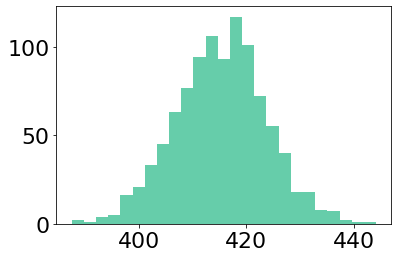

In [72]:
plt.hist(means_1,bins=25,color='mediumaquamarine')
plt.show()

### Exercise 4 (in class) - play with the number of samples and points per sample

In [ ]:
means_2, stdevs_2 = repeat_samples_stats(draw_sample, population, 'mass', 500, 1000)

In [ ]:
plt.hist(means_2, bins=50,color='mediumaquamarine')
plt.show()

Now let's make a function with five arguments `sample_stats_funct`, `df`, `column`, `M` and `n` that takes the return values from the last function and
* converts the lists to a single dataframe
* plots two histograms of the columns (mean, sd)
* prints out the mean and sd of the columns

In [ ]:
def describe_sample(sample_stats_funct, df, column, M, n):
    
    means, sds = sample_stats_funct(draw_sample, df, column, M, n)
    df = pd.DataFrame(data={'means': means, 'sds': sds})
    
    df.hist(bins=100,color='mediumorchid')
    print('Mean: {}'.format(np.round(df['means'].mean(), 3)))
    print('Std Dev: {}'.format(np.round(df['sds'].mean(), 3)))
    
    return df

In [ ]:
df = describe_sample(repeat_samples_stats, population, 'mass', 1000, 100)

In [ ]:
print(true_mean, true_stdev)

In [ ]:
df = describe_sample(repeat_samples_stats, population, 'mass', 1000, 50)

## Next time - Bootstrapping